In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [35]:
mnist = tf.keras.datasets.fashion_mnist

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


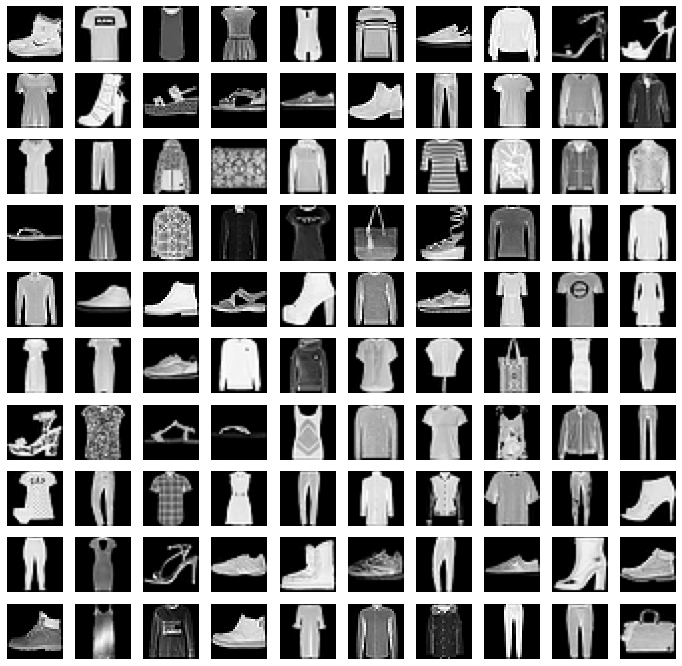

In [38]:
plt.figure(figsize = (12,12))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(x_train[i], cmap="gray")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


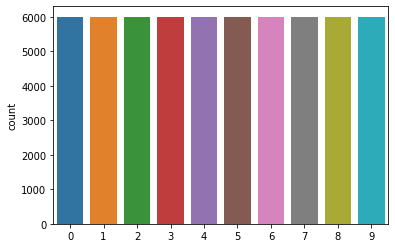

In [39]:
sns.countplot(y_train)

In [40]:
x_train = x_train.reshape([60000, 28, 28, 1])
x_test = x_test.reshape([10000, 28, 28, 1])

In [41]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [43]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range =10,
    zoom_range =0.1,
    width_shift_range= 0.1,
    height_shift_range = 0.1,
)
train_datagen.fit(x_train)

In [44]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen.fit(x_test)

In [45]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu', input_shape=(28,28,1)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
                                    
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [46]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss = "categorical_crossentropy",
              metrics=['accuracy'])

In [47]:
 history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    validation_data = val_datagen.flow(x_test, y_test),
    batch_size = 64,
    epochs=20,
    verbose=1
)

Epoch 1/20
938/938 [==============================] - 49s 19ms/step - loss: 0.6417 - accuracy: 0.7566 - val_loss: 0.4564 - val_accuracy: 0.8331
Epoch 2/20
938/938 [==============================] - 18s 19ms/step - loss: 0.4387 - accuracy: 0.8362 - val_loss: 0.3516 - val_accuracy: 0.8740
Epoch 3/20
938/938 [==============================] - 18s 19ms/step - loss: 0.3759 - accuracy: 0.8593 - val_loss: 0.3283 - val_accuracy: 0.8776
Epoch 4/20
938/938 [==============================] - 17s 19ms/step - loss: 0.3471 - accuracy: 0.8702 - val_loss: 0.3106 - val_accuracy: 0.8831
Epoch 5/20
938/938 [==============================] - 18s 19ms/step - loss: 0.3289 - accuracy: 0.8770 - val_loss: 0.2977 - val_accuracy: 0.8881
Epoch 6/20
938/938 [==============================] - 18s 19ms/step - loss: 0.3107 - accuracy: 0.8834 - val_loss: 0.2941 - val_accuracy: 0.8918
Epoch 7/20
938/938 [==============================] - 18s 19ms/step - loss: 0.2952 - accuracy: 0.8895 - val_loss: 0.2722 - val_accuracy:

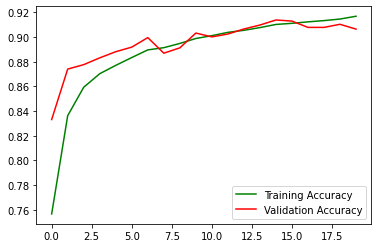

In [48]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']

plt.figure()
plt.plot(acc, color="green", label="Training Accuracy")
plt.plot(val_acc, color="red", label="Validation Accuracy")
plt.legend()

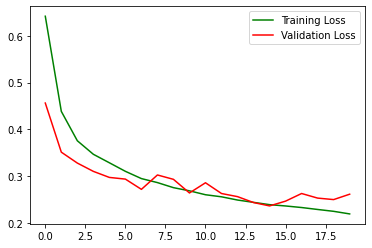

In [49]:
loss = history.history['loss']
val_loss= history.history['val_loss']

plt.figure()
plt.plot(loss, color="green", label="Training Loss")
plt.plot(val_loss, color="red", label="Validation Loss")
plt.legend()